In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import dataset
data = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')

In [3]:
# view dataset
data.head(5)
# change comments column to int and drop nulls
data.drop(['Region', 'Stage', 'Individual ID', 'Comments'], axis=1, inplace=True)
# drop nulls
data.dropna(inplace=True)
# review dataset
data.head(5)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,39.3,20.6,190.0,3650.0,8.66496,-25.29805
6,38.9,17.8,181.0,3625.0,9.18718,-25.21799


In [4]:
# standardize data, ETL
data_std = pd.DataFrame(StandardScaler().fit_transform(data))

In [5]:
# copy over columns
data_std.columns = data.columns

In [6]:
#view standardized data frame
data_std.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,-0.836108,0.149089,-1.098327,-0.517252,0.392385,1.267428
1,-0.689012,0.452790,-0.452764,-1.201393,-0.662823,0.456176
2,-1.350945,1.110807,-0.596222,-0.952614,0.060131,0.467307
3,-0.872882,1.768824,-0.811410,-0.703836,-0.124192,0.500609
4,-0.946430,0.351556,-1.456974,-0.734933,0.823690,0.602333


In [7]:
# investigate correlations in dataset
data_std.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.225939,0.649178,0.593411,-0.059759,0.180734
Culmen Depth (mm),-0.225939,1.000000,-0.581073,-0.467746,0.605874,0.425820
Flipper Length (mm),0.649178,-0.581073,1.000000,0.874801,-0.507787,-0.382059
Body Mass (g),0.593411,-0.467746,0.874801,1.000000,-0.537888,-0.375582
Delta 15 N (o/oo),-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),0.180734,0.425820,-0.382059,-0.375582,0.570615,1.000000


In [8]:
# flipper length and body mass
x = data_std['Body Mass (g)']
y = data_std['Flipper Length (mm)']

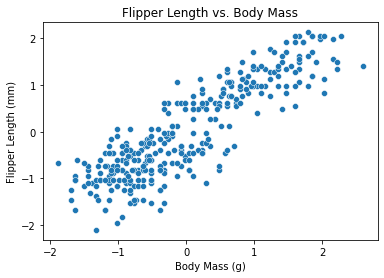

In [9]:
# create plot
ax = sns.scatterplot(x=x, y=y)
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')
ax.set_title('Flipper Length vs. Body Mass')
plt.show()

In [17]:
# create clusters
clustering = DBSCAN(eps=1, min_samples=12).fit(data_std)

labelsList = ['Noise']
labelsList = labelsList + ['Cluster ' + str(i) for i in range(1,len(set(clustering.labels_)))]

data_std['clusters'] = clustering.labels_

print(clusters)

[-1 -1  0 -1  0 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0 -1
  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 -1 -1 -1 -1  0  0  0  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  1  1
  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1
  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 -1  2  2  2 -1  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2

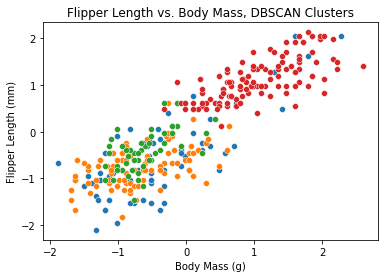

In [22]:
# create dbscan plot
dbs_df = data_std
dbs_df['Cluster'] = clusters
u_label = np.unique(clusters)

for i in u_label:
    temp_df = dbs_df[dbs_df['Cluster'] == i]
    ax = sns.scatterplot(x=temp_df['Body Mass (g)'], y=temp_df['Flipper Length (mm)'])
    ax.set(title='Flipper Length vs. Body Mass, DBSCAN Clusters')
    

In [14]:
# silouette score
dbs_clustered = clusters.loc[(clusters >= 0)]

silhouette_score(dbs_clustered[["x", "y"]], dbs_clustered[["clusters"]])

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

## Kmeans

In [12]:
# import dataset
df = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')

In [13]:
# view dataset
df.head(5)
# change comments column to int and drop nulls
df.drop(['Region', 'Stage', 'Individual ID', 'Comments'], axis=1, inplace=True)
# drop nulls
df.dropna(inplace=True)
# review dataset
df.head(5)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,39.3,20.6,190.0,3650.0,8.66496,-25.29805
6,38.9,17.8,181.0,3625.0,9.18718,-25.21799
